In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)

![Titanic Route](https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic_voyage_map.png/450px-Titanic_voyage_map.png)

## EDA

In [3]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.sample(10)

PassengerId  Survived  Pclass  \
30            31         0       1   
484          485         1       1   
461          462         0       3   
780          781         1       3   
539          540         1       1   
280          281         0       3   
387          388         1       2   
879          880         1       1   
289          290         1       3   
121          122         0       3   

                                              Name     Sex   Age  SibSp  \
30                        Uruchurtu, Don. Manuel E    male  40.0      0   
484                        Bishop, Mr. Dickinson H    male  25.0      1   
461                            Morley, Mr. William    male  34.0      0   
780                           Ayoub, Miss. Banoura  female  13.0      0   
539             Frolicher, Miss. Hedwig Margaritha  female  22.0      0   
280                               Duane, Mr. Frank    male  65.0      0   
387                               Buss, Miss. Kate  female  36.0      0   
879  Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
289                           Connolly, Miss. Kate  female  22.0      0   
121                     Moore, Mr. Leonard Charles    male   NaN      0   

     Parch     Ticket     Fare Cabin Embarked  
30       0   PC 17601  27.7208   NaN        C  
484      0      11967  91.0792   B49        C  
461      0     364506   8.0500   NaN        S  
780      0       2687   7.2292   NaN        C  
539      2      13568  49.5000   B39        C  
280      0     336439   7.7500   NaN        Q  
387      0      27849  13.0000   NaN        S  
879      1      11767  83.1583   C50        C  
289      0     370373   7.7500   NaN        Q  
121      0  A4. 54510   8.0500   NaN        S

<Axes: xlabel='Pclass', ylabel='count'>

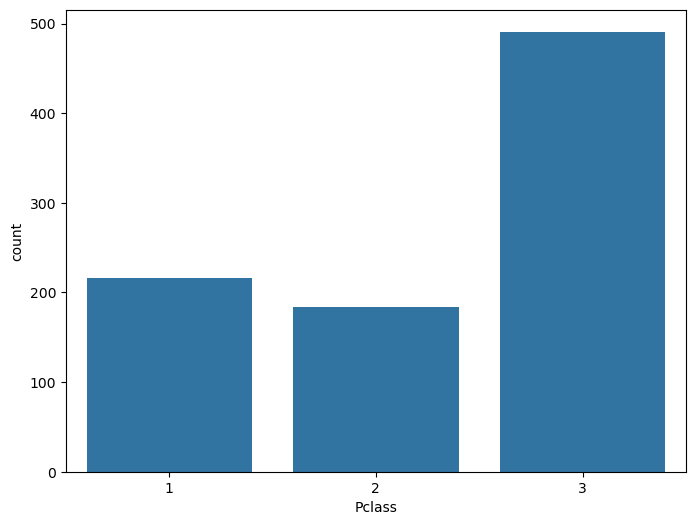

In [4]:
sns.countplot(x='Pclass', data=titanic)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
titanic.loc[:, ('Cabin', 'Pclass')].groupby('Pclass').count()

Cabin
Pclass       
1         176
2          16
3          12

<Axes: xlabel='Survived', ylabel='count'>

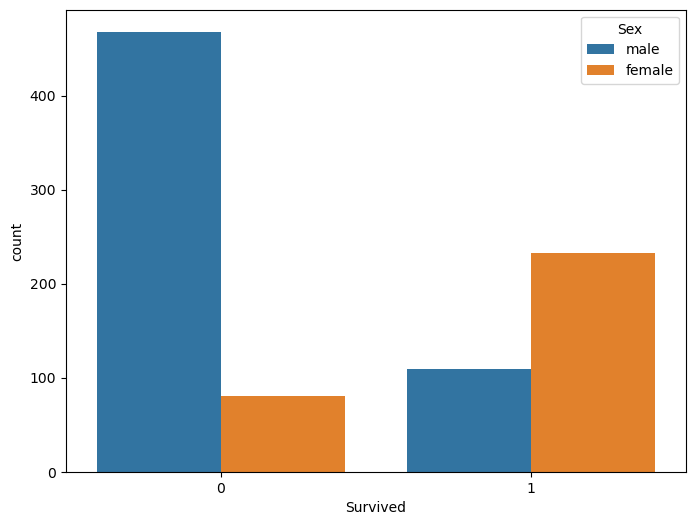

In [8]:
sns.countplot(data=titanic, x='Survived', hue='Sex')

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

<Axes: xlabel='Age', ylabel='Density'>

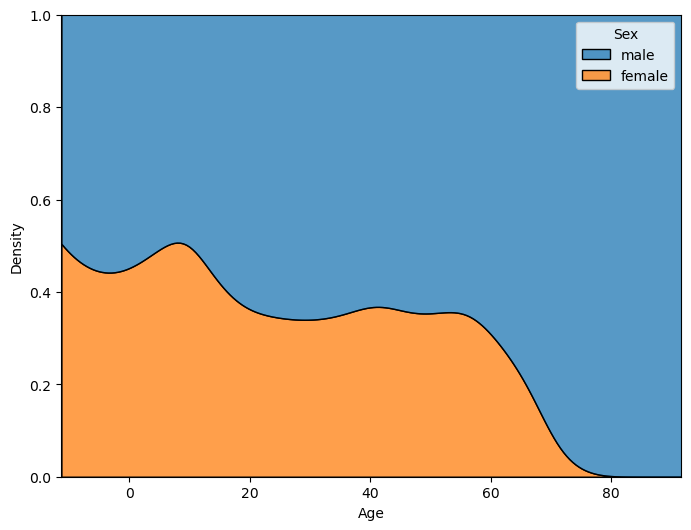

In [10]:
sns.kdeplot(x='Age', data=titanic, hue="Sex", multiple='fill')

<Axes: xlabel='Pclass', ylabel='Age'>

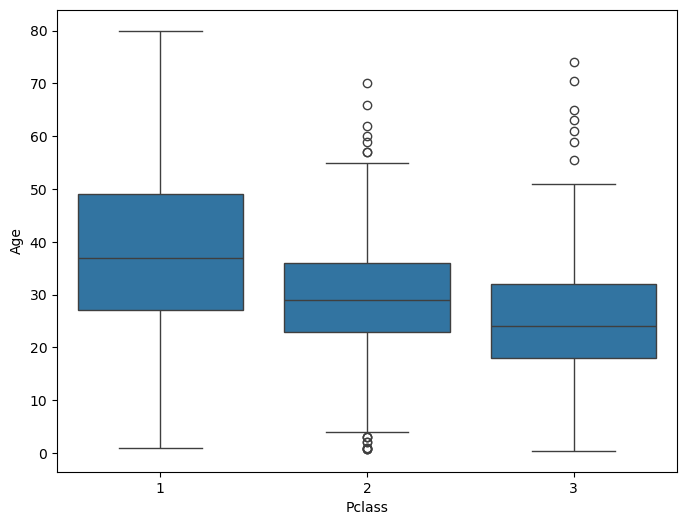

In [11]:
sns.boxplot(y='Age', x='Pclass', data=titanic)

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [13]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
titanic = titanic.drop(titanic[titanic.Embarked.isnull()].index)

In [14]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
titanic['Age'] = titanic.Age.fillna(titanic.groupby('Pclass')['Age'].transform('mean'))

In [16]:
titanic.isnull().sum().sum()

0

In [17]:
titanic.sample(5)

Survived  Pclass     Sex       Age  SibSp  Parch      Fare Embarked
465         0       3    male  38.00000      0      0    7.0500        S
318         1       1  female  31.00000      0      2  164.8667        S
754         1       2  female  48.00000      1      2   65.0000        S
593         0       3  female  25.14062      0      2    7.7500        Q
794         0       3    male  25.00000      0      0    7.8958        S

In [18]:
titanic = pd.get_dummies(data=titanic, columns=['Sex', 'Embarked'], drop_first=True)

In [19]:
titanic.sample(5)

Survived  Pclass       Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
714         0       2  52.00000      0      0  13.0000      True       False   
658         0       2  23.00000      0      0  13.0000      True       False   
778         0       3  25.14062      0      0   7.7375      True        True   
610         0       3  39.00000      1      5  31.2750     False       False   
262         0       1  52.00000      1      1  79.6500      True       False   

     Embarked_S  
714        True  
658        True  
778       False  
610        True  
262        True

##
## Training

In [20]:
X = titanic.drop(columns='Survived')
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=421)

In [21]:
def plot_strata(train, test, title):
    train_pct = train.value_counts()
    test_pct = test.value_counts()
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title, fontsize=16)
    ax1.set_title('train')
    ax2.set_title('test')
    ax1.pie(train_pct, autopct='%1.1f%%', labels=train_pct.index)
    ax2.pie(test_pct, autopct='%1.1f%%', labels=test_pct.index)

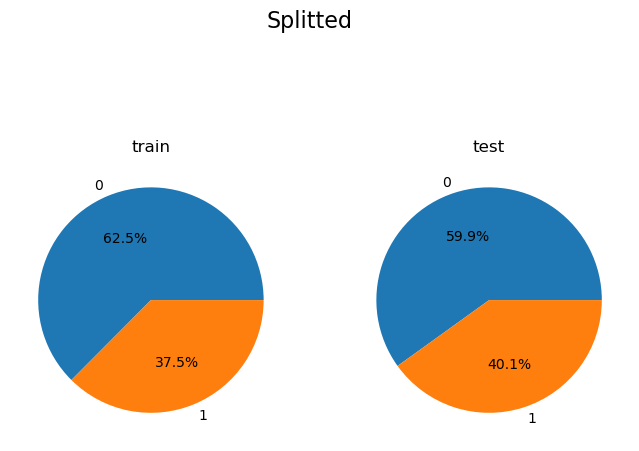

In [22]:
plot_strata(y_train, y_test, 'Splitted')

## Strata

* *Stratum*/*Strata* = Teilmenge mit bestimmtem Merkmal(z.B. `age < 18`)
* Verteilungen von interessanten Features müssen in Train- und Testset nicht gleich sein
* Kann mit `stratify=<feature>` erzwungen werden
* Üblicherweise empfehlenswert

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

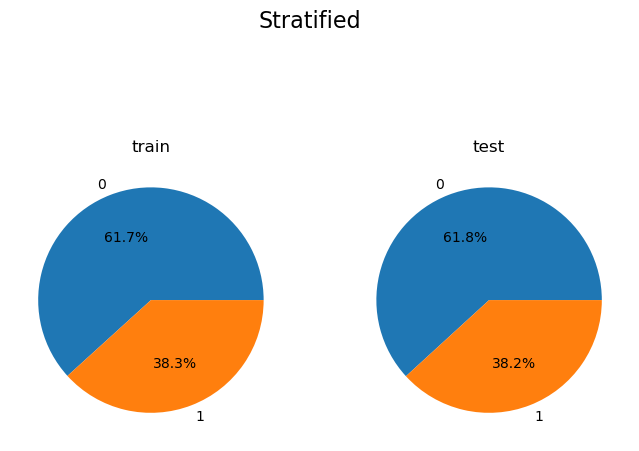

In [24]:
plot_strata(y_train, y_test, 'Stratified')

### Logistic Regression aka Sigmoid

![graph](./assets/logistic-regression.png)

* Gibt Wahrscheinlichkeiten aus

In [25]:
log_reg = LogisticRegression(solver='newton-cg')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8052434456928839

In [31]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7865168539325843

In [34]:
sample = pd.DataFrame(data=[
    [1, 17, 0, 0, 90, 0, 1, 0],
], columns=X_train.columns)
sample

Pclass  Age  SibSp  Parch  Fare  Sex_male  Embarked_Q  Embarked_S
0       1   17      0      0    90         0           1           0

In [35]:
print('log_reg', log_reg.predict_proba(sample))
print('forest ', forest.predict_proba(sample))

log_reg [[0.02069262 0.97930738]]
forest  [[0.03 0.97]]
